1) При помощи стека (можно использовать любую реализацию стека, например, из лекции) проверить, что в строке, содержащей большой фрагмент кода на python, корректно открываются и закрываются скобки '(' и ')'. Заводить какие-либо счетчики и вообще вести подсчет скобок запрещено. 
Например, в следующей строке корректное количество скобок: 
'((dsasdas((das(d)das)d)asd)da)' 
А вот в следующей закрывающих больше, чем открывающих:
'(f(gfhd((hgfdg((fghh)dads)das))ds)adddads())))' 


------------------------------------------------------------------------
стек - принцип LIFO - last in first out (стопка тарелок)
базовые операции:
S.push(element) - добавляет элемент на вершину
S.pop() - удаляет верхний элемент и возвращает его

In [5]:
from collections import deque  # специальный класс, который реадизует возможности стека и много другое


class Stack(deque):
    def push(self, elem):
        self.append(elem)  # метод append из deque
    

def check_parentheses(s):
    my_stack = Stack()
    for char in s:
        if char == '(':  # если есть открывающая скобка, то кладем ее в стек
            my_stack.push(char)
        elif char == ')':  # если закрывающая скобка и стек не пустой, удаляем откр. скобку, иначе - False
            if not my_stack:
                return False
            my_stack.pop()
    if my_stack:  # если в стеке остались отерывающие скобки (они были без пары) - False
        return False
    return True
        
s_code_t = '((dsasdas((das(d)das)d)asd)da)'
s_code_f = '(f(gfhd((hgfdg((fghh)dads)das))ds)adddads())))'
print(f'True : {check_parentheses(s_code_t)}\nFalse : {check_parentheses(s_code_f)}')


True : True
False : False


2) С помощью списка (list) реализовать стек. При создании стека нужно передать максимальную длину стека. В случае попытки добавления элемента, приводящего к превышению емкости стека возвращать ошибку. 
Стек должен поддерживать следующие операции: 
S.push(e): добавление элемента e на вершину стека S. 
S.pop(): удаляет и возвращает верхний элемент стека S. Если стек пуст, то возникает ошибка. 
S.top(): возвращает верхний элемент стека S, не удаляя его. Если стек пуст, то возникает ошибка. 
S.is_empty( ): возвращает True если стек S не содержит ни одного элемента. 
len(S): возвращает текущеее количество элементов в стеке S. 


In [6]:
class Stack_2(object):
    def __init__(self, max_len):
        self.max_len = max_len
        self.stack = []
    
    def push(self, elem):
        if self.max_len <= len(self):
            raise ValueError('Stack overflow')
        self.stack.append(elem)
    
    def is_empty(self):
        if not self.stack:
            return True
        return False
    
    def pop(self):
        if self.is_empty():
            raise ValueError('Empty stack')
        return self.stack.pop()
    
    def top(self):
        if self.is_empty():
            raise ValueError('Empty stack')
        return self.stack[-1]
    
    def __len__(self):  # по определению нельзя применить len() к экземпляру класса, __len__ позволяет это сделать
        return len(self.stack)
    


In [7]:
# примеры использования класса   
s = Stack_2(5)
s.push(5)
s.push(50)
s.push(-5)
print(s.stack)
print(f'len: {len(s)}')
s.pop()
print(s.stack, f' top: {s.top()}')
print(f'is empty: {s.is_empty()}')
s.pop()
s.pop()
print(s.stack)
print(f'is empty: {s.is_empty()}')
print(f'len: {len(s)}')
#s.pop()
#s.top()
s2 = Stack_2(1)
s2.push(5)
#s2.push(50)


[5, 50, -5]
len: 3
[5, 50]  top: 50
is empty: False
[]
is empty: True
len: 0


3) Реализовать класс однонаправленного связанного списка.  

3.1) Реализовать метод добавления элемента в начало списка.  


## Решение:
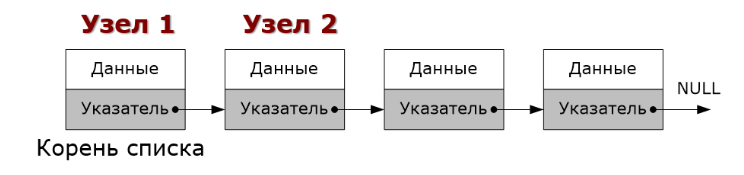

Указатель на первый узел

Указатель на последний узел


- Функция проверки наличия узлов в списке

- Функция добавления элемента в конец списка
- Функция добавления элемента в начало списка

- Функция удаления первого узла
- Функция удаления последнего узла

- Функция печати всего списка


In [4]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.next = None

In [5]:
class LinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        
    def create_node(self, val):
        return Node(val)

    def is_empty(self):
        return self.head == None

    def push_head(self, new_val):
        new_node = self.create_node(new_val)
        if self.is_empty():
            self.head = new_node
            self.tail = new_node
        else:
            tmp_node = self.head
            self.head = new_node
            self.head.next = tmp_node
        
    def push_tail(self, new_val):
        new_node = self.create_node(new_val)
        if self.is_empty():
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            self.tail = new_node

    def pop_first(self):
        if self.is_empty():
            raise ValueError('Empty linked list')
        tmp_node = self.head
        self.head = self.head.next
        return tmp_node
            
    def pop_last(self):
        if self.is_empty():
            raise ValueError('Empty linked list')
        if self.head == self.tail:
            return self.pop_first()
        
        tmp_node = self.head
        while tmp_node.next != self.tail:
            tmp_node = tmp_node.next
        tmp2_node = self.tail
        self.tail = tmp_node
        self.tail.next = None
        return tmp2_node             
    
    def print_list(self):
        if self.is_empty():
            return
        node = self.head
        while(node):
            print(node.value, end=' ')
            node = node.next
        print()
        
    def __len__(self):  # по определению нельзя применить len() к экземпляру класса, __len__ позволяет это сделать
        length = 0
        tmp_node = self.head
        while tmp_node:
            tmp_node = tmp_node.next
            length += 1
        return length
        

In [6]:
# примеры использования класса
l = LinkedList()
l.push_tail(12)
l.push_head(10)
l.push_head(11)
l.push_tail(12)
l.push_head(100)

l.print_list()
print(f'len {len(l)}')

l.pop_last()
l.pop_last()
l.pop_first()
print(l.tail.next)
print(l.is_empty())
l.pop_first()
l.print_list()
print(l.is_empty())
l.pop_first()
l.print_list()
print(f'len {len(l)}')

100 11 10 12 12 
len 5
None
False
10 
False
len 0


4) На базе класса однонаправленного связанного списка реализовать двунаправленный связанный список.  

4.1) Реализовать метод добавления элемента в начало списка.  


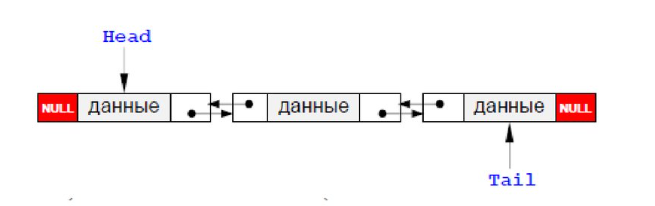

In [7]:
class DoublyNode(object):
    def __init__(self, value):
        self.value = value
        self.next = None
        self.prev = None

In [8]:
class DoublyLinkedList(LinkedList):
        
    def create_node(self, val):
        return DoublyNode(val)

    def push_head(self, new_val):
        super().push_head(new_val)
        if self.head.next:
            tmp_node = self.head.next
            tmp_node.prev = self.head
        
    def push_tail(self, new_val):
        new_node = self.create_node(new_val)
        if self.is_empty():
            self.head = new_node
            self.tail = new_node
        else:
            tmp_node = self.tail
            self.tail.next = new_node
            self.tail = new_node
            new_node.prev = tmp_node

    def pop_first(self):
        tmp_node = super().pop_first()
        if not self.is_empty():
            self.head.prev = None 
        return tmp_node
         

In [9]:
# примеры использования класса
dl = DoublyLinkedList()
dl.push_tail(100)
dl.push_head(10)
dl.push_tail(100)
print(dl.is_empty())
dl.print_list()
print(f'len {len(dl)}')

dl.pop_first()
dl.print_list()
dl.pop_last()
dl.print_list()

print(dl.is_empty())
print(f'len {len(dl)}')

False
10 100 100 
len 3
100 100 
100 
False
len 1


5) При помощи класса связанного списка реализовать очередь.

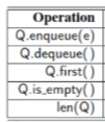

In [10]:
class MyQueue(object):
    def __init__(self):
        self.queue = DoublyLinkedList()
    
    def enqueue(self, elem):  # добавляем в конец очереди элемент
        self.queue.push_tail(elem)
        
    def dequeue(self):  # досиаем из начала очереди элемент
        return self.queue.pop_first().value
    
    def first(self):
        if not self.is_empty():
            return self.queue.head.value
        return 
    
    def is_empty(self):
        return self.queue.is_empty()
    
    def __len__(self):
        return len(self.queue)
    
    def print_q(self):
        self.queue.print_list()

In [11]:
# примеры использования класса
q = MyQueue()

print(q.is_empty())
q.enqueue('qq')
q.print_q()
print(f'len: {len(q)}')

q.enqueue('qqq')
q.enqueue('rrrr')
q.print_q()
print(q.is_empty())
print(f'len: {len(q)}')
print(f'first: {q.first()}\n')

q.dequeue()
q.print_q()
print(q.is_empty())
print(f'len: {len(q)}')
print(f'first: {q.first()}\n')

q.dequeue()
q.dequeue()
q.print_q()
print(q.is_empty())
print(f'len: {len(q)}')
print(f'first: {q.first()}\n')



True
qq 
len: 1
qq qqq rrrr 
False
len: 3
first: qq

qqq rrrr 
False
len: 2
first: qqq

True
len: 0
first: None



In [12]:
q.dequeue()

ValueError: Empty linked list